In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

In [2]:
df = pd.DataFrame.from_csv('train.csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,...,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000
mean,2757.419478,155.577794,16.372189,227.898810,50.540427,1765.400050,212.920304,218.910714,134.888476,1557.455771,...,0.044643,0.041005,0.001240,0.006200,0.000661,0.001984,0.046131,0.043237,0.027943,3.936508
std,411.173336,110.091757,8.488352,207.914221,60.701726,1382.223276,30.264925,22.889814,45.753225,1142.306119,...,0.206527,0.198311,0.035194,0.078501,0.025710,0.044501,0.209777,0.203400,0.164817,2.008400
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2393.000000,63.000000,10.000000,67.000000,5.000000,764.000000,197.000000,207.000000,107.000000,750.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2766.000000,124.000000,15.000000,180.000000,32.000000,1332.000000,220.000000,223.000000,138.000000,1296.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3100.000000,259.000000,22.000000,330.000000,79.000000,2389.500000,235.000000,235.000000,167.000000,2052.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


`Cover_Type` is at the nominal level but it hasn't been converted to a series of dummy variables  
=> `Cover_Type` is actually `y` so it probably should be left alone

In [17]:
df['Cover_Type'].value_counts(normalize=True)

2    0.157986
1    0.148479
5    0.148148
7    0.137483
6    0.136822
3    0.136326
4    0.134755
Name: Cover_Type, dtype: float64

The null accuracy to beat is 15.8%

In [5]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


No missing values

In [7]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.014040,-0.318517,0.401669,0.106202,0.573499,0.105644,0.218589,0.087629,0.423920,...,0.169353,0.114792,0.018607,0.115279,0.041387,0.068343,0.315188,0.296367,0.293918,-0.003898
Aspect,-0.014040,1.000000,0.023901,0.037578,0.056077,0.066036,-0.592101,0.328449,0.633729,-0.062489,...,0.005298,0.031221,0.015094,-0.005294,0.003283,-0.046052,0.030765,-0.029018,0.013140,0.001510
Slope,-0.318517,0.023901,1.000000,-0.058098,0.276159,-0.295738,-0.197451,-0.621303,-0.337008,-0.249032,...,-0.145353,0.079735,-0.033372,-0.040315,-0.004159,0.006800,-0.142623,0.046276,-0.037752,0.113290
Horizontal_Distance_To_Hydrology,0.401669,0.037578,-0.058098,1.000000,0.642176,0.191883,-0.031491,0.080659,0.079617,0.149798,...,0.149166,0.055076,0.069573,-0.018254,0.080829,-0.023515,0.132584,0.069211,0.223897,-0.021359
Vertical_Distance_To_Hydrology,0.106202,0.056077,0.276159,0.642176,1.000000,-0.009410,-0.099457,-0.139219,-0.039238,-0.033398,...,0.030635,0.081890,0.027125,-0.024665,0.015982,-0.030423,-0.002257,0.062426,0.201786,0.080465
Horizontal_Distance_To_Roadways,0.573499,0.066036,-0.295738,0.191883,-0.009410,1.000000,-0.001022,0.257053,0.184471,0.475629,...,0.020830,0.032424,0.015148,0.057172,0.028882,0.055893,0.176284,0.115801,0.126136,-0.151180
Hillshade_9am,0.105644,-0.592101,-0.197451,-0.031491,-0.099457,-0.001022,1.000000,-0.015564,-0.775537,0.091688,...,0.020794,-0.068774,0.000636,0.032154,0.014094,0.008957,0.018863,0.019000,-0.014189,-0.007607
Hillshade_Noon,0.218589,0.328449,-0.621303,0.080659,-0.139219,0.257053,-0.015564,1.000000,0.621525,0.124019,...,0.098102,-0.018154,0.027745,0.031919,0.028901,-0.037893,0.099072,-0.052819,-0.007645,-0.111862
Hillshade_3pm,0.087629,0.633729,-0.337008,0.079617,-0.039238,0.184471,-0.775537,0.621525,1.000000,0.035625,...,0.057925,0.034976,0.018621,-0.002340,0.004350,-0.025920,0.060586,-0.048123,0.015730,-0.067066
Horizontal_Distance_To_Fire_Points,0.423920,-0.062489,-0.249032,0.149798,-0.033398,0.475629,0.091688,0.124019,0.035625,1.000000,...,0.011849,0.031150,-0.007738,-0.000502,-0.009658,0.035009,0.066828,0.042059,0.107585,-0.115691


In [13]:
df.describe()[['Soil_Type7', 'Soil_Type15']]

,Soil_Type7,Soil_Type15
count,12096.0,12096.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


`Soil_Type7` and `Soil_Type15` are redundant

Should create new features and use dimensionality reduction to reduce them

Before doing anything I probably should calculate the baseline accuracy with an off-the-shelf classifier

### Separate valid and test sets

In [7]:
num_valid = int(len(df) * 0.2)
num_train = len(df) - num_valid
num_valid, num_train

(2419, 9677)

In [8]:
train_df = df[:num_train]
valid_df = df[num_train:num_train+num_valid]

In [9]:
len(valid_df), len(train_df)

(2419, 9677)

In [11]:
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [10]:
valid_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
9678,3423,259,15,886,238,4740,182,247,203,2903,...,0,0,0,0,0,0,0,1,0,7
9679,3753,320,14,902,307,5245,182,225,183,3349,...,0,0,0,0,0,0,0,0,1,7
9680,3763,10,21,979,354,4767,193,193,132,2897,...,0,0,0,0,0,0,0,0,1,7
9681,3777,9,18,1041,368,4824,197,202,138,2942,...,0,0,0,0,0,0,0,0,1,7
9682,3129,8,7,270,44,624,212,227,152,969,...,0,0,0,0,0,0,0,0,0,1


In [20]:
train_X = train_df.drop('Cover_Type', axis=1)
train_Y = train_df[['Cover_Type']]

In [41]:
Y_COLUMN_NAME = 'Cover_Type'

def split_dataset(df):
    return df.drop(Y_COLUMN_NAME, axis=1), df[[Y_COLUMN_NAME]]

In [42]:
train_X, train_Y = split_dataset(train_df)
valid_X, valid_Y = split_dataset(valid_df)

### Get baseline accuracy

In [43]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_Y['Cover_Type'])
print('%f%%' % (knn.score(valid_X, valid_Y) * 100))

50.847458%


Although above the null accuracy, baseline accuracy is still very low  

KNN depends on the euclidean distance  
Maybe try scaling?  

In [54]:
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('classifier', KNeighborsClassifier())])
pipeline.fit(train_X, train_Y['Cover_Type'])
print('train %f%%' % (pipeline.score(train_X, train_Y) * 100))
print('valid %f%%' % (pipeline.score(valid_X, valid_Y) * 100))

train 85.584375%
valid 55.973543%


- Validation score has improved by 5%  
- The model seems to be overfitting  

Maybe I'm scaling columns that aren't in the interval/ratio level?

In [62]:
pd.DataFrame(pipeline.steps[0][1].fit_transform(train_X)).describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,...,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03,9.677000e+03
mean,1.943722e-16,6.313483e-17,-1.226592e-15,1.410466e-15,-2.096264e-15,1.292296e-16,-1.225295e-16,-9.627746e-16,-6.098941e-17,2.769075e-16,...,-3.083293e-15,2.339654e-15,-4.934613e-15,2.803702e-16,-6.837575e-15,2.686463e-15,-6.331409e-17,3.747952e-15,1.159423e-14,9.069944e-15
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,...,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.071688e+00,-1.424921e+00,-1.910266e+00,-1.091348e+00,-3.129864e+00,-1.258539e+00,-6.868754e+00,-5.206005e+00,-2.908632e+00,-1.328236e+00,...,-1.521677e-01,-2.277012e-01,-1.828275e-01,-3.051075e-02,-5.576536e-02,-2.876433e-02,-4.986255e-02,-2.294532e-01,-1.893662e-01,-1.304828e-01
25%,-9.255740e-01,-8.381511e-01,-7.440530e-01,-7.985055e-01,-7.773783e-01,-7.188289e-01,-5.337437e-01,-5.110468e-01,-6.062925e-01,-7.207170e-01,...,-1.521677e-01,-2.277012e-01,-1.828275e-01,-3.051075e-02,-5.576536e-02,-2.876433e-02,-4.986255e-02,-2.294532e-01,-1.893662e-01,-1.304828e-01
50%,5.542195e-02,-2.874899e-01,-1.609464e-01,-2.128212e-01,-3.034964e-01,-3.209567e-01,2.419719e-01,1.410308e-01,8.225762e-02,-2.203039e-01,...,-1.521677e-01,-2.277012e-01,-1.828275e-01,-3.051075e-02,-5.576536e-02,-2.876433e-02,-4.986255e-02,-2.294532e-01,-1.893662e-01,-1.304828e-01
75%,7.911689e-01,9.943772e-01,6.554030e-01,4.899999e-01,4.919484e-01,4.333277e-01,7.267941e-01,7.061647e-01,7.062562e-01,4.363785e-01,...,-1.521677e-01,-2.277012e-01,-1.828275e-01,-3.051075e-02,-5.576536e-02,-2.876433e-02,-4.986255e-02,-2.294532e-01,-1.893662e-01,-1.304828e-01
max,2.520053e+00,1.824883e+00,4.154043e+00,5.463436e+00,8.514093e+00,3.753052e+00,1.340902e+00,1.532130e+00,2.427632e+00,4.661796e+00,...,6.571698e+00,4.391721e+00,5.469637e+00,3.277533e+01,1.793228e+01,3.476528e+01,2.005513e+01,4.358188e+00,5.280773e+00,7.663848e+00


Don't know what to do  
Leave for now  

Remove `Soil_Type7` and `Soil_Type15`

In [64]:
REDUNDANT_COLS = ['Soil_Type7', 'Soil_Type15'] 
train_X.drop(REDUNDANT_COLS, axis=1, inplace=True)
valid_X.drop(REDUNDANT_COLS, axis=1, inplace=True)

In [70]:
train_X['Soil_Type7']

KeyError: 'Soil_Type7'

In [65]:
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('classifier', KNeighborsClassifier())])
pipeline.fit(train_X, train_Y['Cover_Type'])
print('train %f%%' % (pipeline.score(train_X, train_Y) * 100))
print('valid %f%%' % (pipeline.score(valid_X, valid_Y) * 100))

train 85.584375%
valid 55.973543%


No difference in accuracy

In [77]:
params = {'classifier__n_neighbors': [1, 3, 5, 7]}
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('classifier', KNeighborsClassifier())])
grid = GridSearchCV(pipeline, params)
grid.fit(train_X, train_Y['Cover_Type'])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classifier__n_neighbors': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
print('train %f%%' % (grid.score(train_X, train_Y) * 100))
print('valid %f%%' % (grid.score(valid_X, valid_Y) * 100))

train 83.176604%
valid 55.932203%


In [87]:
grid.cv_results_

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/k8tems/anaconda3/lib/python

{'mean_fit_time': array([ 0.05961879,  0.06319571,  0.05782326,  0.06078331]),
 'mean_score_time': array([ 0.47697075,  0.53878005,  0.58516542,  0.65720709]),
 'mean_test_score': array([ 0.46005994,  0.47101374,  0.48444766,  0.49064793]),
 'mean_train_score': array([ 1.        ,  0.90110709,  0.86411166,  0.84313473]),
 'param_classifier__n_neighbors': masked_array(data = [1 3 5 7],
              mask = [False False False False],
        fill_value = ?),
 'params': [{'classifier__n_neighbors': 1},
  {'classifier__n_neighbors': 3},
  {'classifier__n_neighbors': 5},
  {'classifier__n_neighbors': 7}],
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([ 0.43649318,  0.4448575 ,  0.45229244,  0.4622057 ]),
 'split0_train_score': array([ 1.        ,  0.90401613,  0.86447511,  0.84338657]),
 'split1_test_score': array([ 0.50371978,  0.516739  ,  0.51921885,  0.52231866]),
 'split1_train_score': array([ 1.        ,  0.90513099,  0.86916757,  0.852581  ]),
 'sp

Why am I getting a lower score with `GridSearchCV`?

Apparently `GridSearchCV` has builtin cross validation so the cause could be less data  
Should try concatenating train and valid data

In [89]:
X = df.drop(REDUNDANT_COLS+[Y_COLUMN_NAME], axis=1)
Y = df[[Y_COLUMN_NAME]]

In [146]:
params = {
    'scale__with_std': [True, False],
    'scale__with_mean': [True, False],
    'classifier__n_neighbors': [1, 3, 5, 7]}
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('classifier', KNeighborsClassifier())])
grid = GridSearchCV(pipeline, params)
grid.fit(X, Y['Cover_Type'])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scale__with_std': [True, False], 'scale__with_mean': [True, False], 'classifier__n_neighbors': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
'score %.2f%% params %s' % (grid.best_score_ * 100, grid.best_params_)

"score 56.46% params {'classifier__n_neighbors': 7, 'scale__with_mean': True, 'scale__with_std': True}"

### Reduce Dimensions

In [104]:
params = {
    'classifier__n_neighbors': [1, 3, 5, 7],
    'rbm__n_components': [5, 10, 25, 40]}
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('rbm', BernoulliRBM(random_state=0)),
                     ('classifier', KNeighborsClassifier())])
grid = GridSearchCV(pipeline, params)
grid.fit(X, Y['Cover_Type'])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=256, n_iter=10,
       random_state=0, verbose=0)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classifier__n_neighbors': [1, 3, 5, 7], 'rbm__n_components': [5, 10, 25, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
'score %.2f%% params %s' % (grid.best_score_ * 100, grid.best_params_)

"score 28.73% params {'classifier__n_neighbors': 5, 'rbm__n_components': 40}"

`BernoulliRBM` might not be compatible with `KNN`

Try `LogisticRegression`  

In [108]:
params = {
    'clf__C': [1e-1, 1e0, 1e1],
    'rbm__n_components': [5, 10, 25, 40]}
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('rbm', BernoulliRBM(random_state=0)),
                     ('clf', LogisticRegression())])
grid = GridSearchCV(pipeline, params)
grid.fit(X, Y['Cover_Type'])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=256, n_iter=10,
       random_state=0, verbose=0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fi...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__C': [0.1, 1.0, 10.0], 'rbm__n_components': [5, 10, 25, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
'score %.2f%% params %s' % (grid.best_score_ * 100, grid.best_params_)

"score 26.72% params {'clf__C': 10.0, 'rbm__n_components': 10}"

### Try PCA instead of RBM

In [113]:
mean_vector = X.mean(axis=0)
cov_mat = np.cov((X-mean_vector).T)

In [114]:
cov_mat.shape

(52, 52)

In [118]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))

Eigenvector 1: 
[  1.63090029e-01   1.55242907e-03  -1.75376544e-03   2.88226042e-02
  -5.06523506e-04   8.18355030e-01   7.69816386e-04   3.54188278e-03
   4.38187166e-03   5.50297932e-01   1.34217492e-04  -4.01449600e-06
   1.79868557e-05  -1.48189852e-04  -1.37025682e-05  -1.44607926e-05
  -2.82329102e-05  -1.34337641e-05  -6.77571570e-06  -1.87544778e-05
   1.42407048e-07  -3.91917050e-07  -5.43892249e-05  -7.15758137e-06
   1.19095930e-05  -2.72794146e-06  -6.11023538e-06   4.10984449e-07
  -1.19083470e-05   2.37565138e-06   2.04936736e-06   4.58949515e-06
  -1.92726826e-07   1.01240204e-05   1.87192454e-05   3.10034225e-06
   1.16992047e-08   1.21157039e-06   5.11963774e-07  -1.56830263e-07
   6.17869107e-05  -4.38369551e-06   5.35284303e-07   3.60077229e-06
   5.13567828e-06   1.97673121e-07   2.27606892e-06   3.09253135e-07
   1.60714961e-06   2.22550049e-05   1.45587554e-05   1.53598379e-05]
Eigenvalue 1 from covariance matrix: 2482556.7607896454
Eigenvector 2: 
[  2.40881019e

Text(0,0.5,'% of Variance Explained <= k')

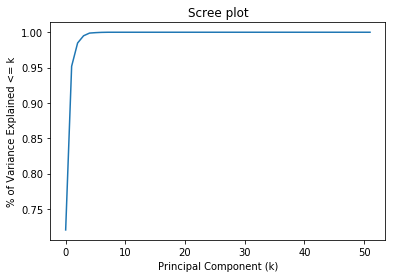

In [123]:
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

In [133]:
params = {
    'classifier__n_neighbors': [1, 3, 5, 7],
    'pca__n_components': [10, 20, 30, 40]}
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('pca', PCA()),
                     ('classifier', KNeighborsClassifier())])
grid = GridSearchCV(pipeline, params)
grid.fit(train_X, train_Y['Cover_Type'])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classifier__n_neighbors': [1, 3, 5, 7], 'pca__n_components': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [134]:
'score %.2f%% params %s' % (grid.best_score_ * 100, grid.best_params_)

"score 50.26% params {'classifier__n_neighbors': 7, 'pca__n_components': 20}"

- Below baseline accuracy
- 10 components should explain 100% of the variability  
Why is 20 the optimal choice?

In [143]:
params = {
    'classifier__n_neighbors': [1, 3, 5, 7],
    'lda__n_components': [10, 20, 30, 40],
    'pca__n_components': [10, 20, 30, 40]}
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('pca', PCA()),
                     ('lda', LinearDiscriminantAnalysis()),
                     ('classifier', KNeighborsClassifier())])
grid = GridSearchCV(pipeline, params)
grid.fit(train_X, train_Y['Cover_Type'])

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-pack

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-pack

"score 51.58% params {'classifier__n_neighbors': 7, 'lda__n_components': 10, 'pca__n_components': 40}"

In [144]:
'score %.2f%% params %s' % (grid.best_score_ * 100, grid.best_params_)

"score 51.58% params {'classifier__n_neighbors': 7, 'lda__n_components': 10, 'pca__n_components': 40}"

Tune parameters for scaling as well

In [140]:
params = {
    'scale__with_std': [True, False],
    'scale__with_mean': [True, False],
    'classifier__n_neighbors': [1, 3, 5, 7],
    'lda__n_components': [10, 20, 30, 40],
    'pca__n_components': [10, 20, 30, 40]}
pipeline = Pipeline([('scale', StandardScaler()), 
                     ('pca', PCA()),
                     ('lda', LinearDiscriminantAnalysis()),
                     ('classifier', KNeighborsClassifier())])
grid = GridSearchCV(pipeline, params)
grid.fit(train_X, train_Y['Cover_Type'])

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-pack

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-pack

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-pack

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-pack

/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/k8tems/anaconda3/lib/python3.6/site-pack

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
           ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scale__with_std': [True, False], 'scale__with_mean': [True, False], 'classifier__n_neighbors': [1, 3, 5, 7], 'lda__n_components': [10, 20, 30, 40], 'pca__n_components': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
'score %.2f%% params %s' % (grid.best_score_ * 100, grid.best_params_)

"score 52.44% params {'classifier__n_neighbors': 7, 'lda__n_components': 40, 'pca__n_components': 30, 'scale__with_mean': True, 'scale__with_std': False}"

Still can't beat baseline accuracy

How can I top 56.46%(`StandardScaler`&`KNN`)?

TODO
- Ensemble